# Plot Watch Accelerometer Data by Day 

*Authors: Cole and Rachel*
*1/28/23*
**Version 1.3**

# 📈⌚

## Notebook parameters

_FILES_ 
- Enter the file folder path to locate files for analyses

_SAVE_PATH_
- Enter the file path with .png to save plots
- Example:'2022-07-02 23:59:00'

_SAVE_DF_
- enter the file path with .csv to save data
- Example: "C:/Users/chags/OneDrive/Documents/R01/Data/DATAFRAME.csv"

MOD_THRESHOLD
- Moderate activity threshold
- Example: 2500

VIG_THRESHOLD
- Vig activity threshold
- Example: 5000

TIME_THRESH
- Time threshold for physical activity
- Example: 18

In [136]:
### Importing libraries ###
import os #working with files in the computer os
import pandas as pd #working with data
from datetime import datetime #working with dates and times
import datetime as dt #working with dates and times
import plotly.express as px #generating plots
import os.path #working with file paths
from datetime import timedelta #time computation
import numpy as np
import warnings #python warnings
warnings.filterwarnings('ignore') # igoring python warnings to decrease clutter


### Set all parameters and run the notbook as is #######################
### Confirm all parameters are correct and not overwriting old files ###
_FILES_ = 'C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day' ## enter the file folder path to locate files for analyses

_PA_TIMESTAMPS_='C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day/2023-02-07/Common/Watch-Watch-PABoutInfo.log.csv' #filename automatically generated, modify if errors occur

_SAVE_PATH_ = 'C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Daily Plots/February/Feb7annotshort.svg' # enter the file path with .png to save plots

bothsave = 'C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Watch Python Comparison Plots/February/Feb7compareannotshort.svg' # enter the file path with .png to save plots


_SAVE_DF_ = "C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Python CSV Files/February/Feb7.csv" #enter the file path with .csv to save data

MOD_THRESHOLD = 2500 # moderate activity threshold
VIG_THRESHOLD = 5000 # vigerous activity threshold
TIME_THRESH = 18 #18 = three minutes, every 6 data points = 1 min


correct_input = input("Are all fields correct? Type y or n and hit enter")
if correct_input == 'y': print("Proceed by running the following cells")
else: print("Please enter the correct parameters")

Are all fields correct? Type y or n and hit entery
Proceed by running the following cells


### Iterating through watch-accelsampling.log files and creating a dataframe
- Searches through a specified file path
- Combines all files into one dataframe
- Searches for activity bouts (watch reported activity timestamps and values) file for plotting

In [137]:
def iter_through_data_files(folder_path, activity_bouts_file=None):
    df = pd.DataFrame() #create empty dataframe
    for root, dirs, files in os.walk(folder_path, topdown=False): #loop through files in a folder path
        for name in files: #look through file names
            if name == "Watch-AccelSampling.log.csv": #csv file we are looking for
                print(os.path.join(root, name))
                try: #look if error arises
                    csv = pd.read_csv(os.path.join(root, name), header=None, parse_dates=[0]) #create a dataframe
                    df = pd.concat([df, csv]) #combine files together
                except pd.errors.EmptyDataError: #show exception if error occurs
                    print(name, " is empty")
                    continue #continue looping
    try: activity_bouts = pd.read_csv(activity_bouts_file, header = None, parse_dates = [0]) #read activity bouts file
    except: activity_bouts = None #return nothing if no file exists
    return df, len(df), activity_bouts #function returns combined data file, total amount of data, and activity bouts dataframe

df, totaldata, activity_bouts = iter_through_data_files(
    folder_path = _FILES_,
    activity_bouts_file = _PA_TIMESTAMPS_
)

C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\00-EST\Watch-AccelSampling.log.csv
C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\01-EST\Watch-AccelSampling.log.csv
C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\02-EST\Watch-AccelSampling.log.csv
C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\03-EST\Watch-AccelSampling.log.csv
C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\04-EST\Watch-AccelSampling.log.csv
C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\05-EST\Watch-AccelSampling.log.csv
C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\06-EST\Watch-AccelSampling.log.csv
C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Past Day\2023-02-07\07-EST\Watch-AccelS

### Modify dataframe
- Add column names that align with accelerometer axes
- Drop unused columns
- Display dataframe

In [138]:
def highlight_columns(df, rows=20, color='lightgreen', columns_to_shadow=[], columns_to_show=[]):
    """
    Highlight a specific column in a dataframe
    df = pandas dataframe
    rows = optional for number of rows to highlight
    color = color of highlight
    columns_to_shadow = str - pandas column
    columns_to_show = list of columns to display
    """
    highlight = lambda slice_of_df: 'background-color: %s' % color
    sample_df = df.head(rows)
    if len(columns_to_show) != 0:
        sample_df = sample_df[columns_to_show]
    highlighted_df = sample_df.style.applymap(highlight, subset=pd.IndexSlice[:, columns_to_shadow])
    return highlighted_df 
def convert_column_names(data):
    data.rename(columns = {2: 'datetime', 4:'x', 5:'y', 6: 'z'}, inplace = True) #rename non-named columns with approp names
    data['vm'] = data['x'].astype(float) + data['y'].astype(float) + data['z'].astype(float) #sum axes and make sure they are floats
    data = data.drop([0,1,3], axis = 1) #drop unused columns
    display(highlight_columns(data.head(), columns_to_shadow=["vm", "x", "y", "z"])) #show data table
    return data #return converted dataframe

df2 = convert_column_names(df)

### Converting timestamps
- Format datetime column to correct date and time
- Extract days and times from datetime
- Reset index
- Find 00:00:00 time for the day
- Find 23:59:00 time for the day
- Display new dataframe

In [139]:
def reset_index_convert_datetime(data):
    data = data.reset_index() #remove index
    data['datetime'] = pd.to_datetime(data["datetime"], unit = 'ms') - timedelta(hours=5) #subtract 4 hour offset 
    data['datetime'] = pd.to_datetime(data["datetime"], errors='coerce', format='%Y-%m-%d %H:%M:%S') #convert datetime to diff format
    data['datetime'] = data['datetime'].astype('datetime64[s]') #make sure datetime is datetime format
    data['day'] = data['datetime'].dt.day_name() #create column to show day
    data_copy = data.set_index("datetime") #create copy of data with index as datetime for compatability with code below
    data_copy = data_copy.tz_localize('CET') #change timezone
    data['time'] = data_copy.index.strftime("%H:%M:%S") #create column by retrieving hours minutes and seconds
    data['days'] = data_copy.index.strftime("%D") #create column with date
    data = data.dropna() #drop missing data
    dt_col = data['datetime'].drop_duplicates() #drop duplicates
    data = data[data.index.isin(dt_col.index)] #remove non-duplicate data
    data['datetime'] = data['datetime'].drop_duplicates() #drop duplicates (may be unecessary)
    display(highlight_columns(data.head(), columns_to_shadow=["datetime", 'day', 'time', 'days'])) #show dataframe
    return data #return dataframe with converted dates and new columns

df2 = reset_index_convert_datetime(df2)

_START_DATETIME_ = df2['datetime'].iloc[0].strftime('%Y-%m-%d') + " 00:00:00" #retrieve the start time considering the day
_END_DATETIME_ = df2['datetime'].iloc[0].strftime('%Y-%m-%d') + " 23:59:00" #retrieve the end time considering the day

### Physical activity algorithm
- Use pa algos based on value and time thresholds to assess the total amount of activity
- Report timestamps of pa
- Uses either old rolling window method or sliding window technique that aligns with watch
- Displays timestamps of pa

In [140]:
def new_pa_algo(data, new_column, column_of_interest, value_threshold, time_threshold): 
    """
    Function that aligns closely with watch algorithm, first establishing all values that are above a value threshold,
    then checking if there at least 75% percent in a window (3 minutes) above the value threshold.
    """
    pa = data[column_of_interest] > value_threshold
    data[new_column] = np.nan
    for i in range(len(data)):
        ran = pa.iloc[i: i+time_threshold]
        try:
            if ran.value_counts()[True] > 14:
                data[new_column].iloc[i] = True
        except:
            continue
    return data[new_column]
def rolling_window(data, method, column_of_interest, new_column_name, time_threshold, value_threshold, time_delta_undershoot, time_delta_overshoot):
    """
    Function that uses either the rolling window method or something similar to the watch method. 
    The function first uses an algorithm to identify values above a threshold for a given time threshold.
    Then, creates a timestamp dataframe that is used to plot each one of these pa activity events.
    data: pandas dataframe
    column_of_interest: string, the column of values (typically vector magnitude)
    new_column_name: string, the column being created, which stores pa activity level (typically mod or vig)
    time_threshold: float or int, specifies the window size (typically 18, since that equals 3 mintues)
    value_threshold: float or int, specifies the threshold of physical activity (2000 or 5000)
    time_delta_overshoot: int, cut off point for pa windows that are too big (more than 75 minutes typically)
    time_delta_undershoot: int, cut off point for pa windows that are too small (less than 3 minutes typically)
    """
    if method == 'python_rolling_window': #rolling window that searches for sum of values in a window that are at least 75% greater than value threshold
        data[new_column_name] = data[column_of_interest].rolling(window=time_threshold, min_periods=1).sum() > (value_threshold * 14)
    if method == 'watch_sliding_window': #sliding window see description above
        data[new_column_name] = new_pa_algo(data = data, new_column= new_column_name, column_of_interest=column_of_interest, value_threshold=value_threshold, time_threshold=time_threshold)

    m = data[new_column_name].ne(data[new_column_name].shift()) #look for values that are not equal then shift the index
    res = pd.DataFrame({new_column_name:data.loc[m,new_column_name],  #create dataframe of values 
                    'starts':data.loc[m, 'time']}) #start times
    res['ends'] = res['starts'].shift(-1, fill_value=len(data)) #end times
    res_true = res[res[new_column_name] == True] #subset true values, meaning values that are moderate or vig pa
    res_true['diff'] = pd.to_datetime(res_true['ends']) - pd.to_datetime(res_true['starts'], unit = 'ns') #time difference between start and stop times
    res_true = res_true[res_true['diff'] > timedelta(minutes=time_delta_undershoot)] #remove data greater than time value
    res_true = res_true[res_true['diff'] < timedelta(minutes=time_delta_overshoot)] #remove data less than time value
    activity_kpi = res_true['diff'].sum() #report the sum time of pa activity
    print(new_column_name, ": ", activity_kpi)
    return data[new_column_name], res_true, activity_kpi #return activity column, activity timestamps, and activity metric
    

###Running the rolling window function#####
#creating moderate threshold column with mod start and stop times   
df2['Mod'], res_true, mod_activity_kpi = rolling_window(
    df2, 
    column_of_interest = 'vm',
    new_column_name = 'Mod',
    method = 'watch_sliding_window', #new method that aligns more with watch is watch_sliding_window, old method is python_rolling_window
    time_threshold = TIME_THRESH,
    value_threshold = MOD_THRESHOLD,
    time_delta_undershoot = 3,
    time_delta_overshoot = 75
)
#creating vig threshold column with vig start and stop times   
df2['Vig'], res_true1, vig_activity_kpi = rolling_window(
    df2, 
    column_of_interest = 'vm',
    new_column_name = 'Vig',
    method = 'watch_sliding_window',#new method that aligns more with watch is watch_sliding_window, old method is python_rolling_window
    time_threshold = TIME_THRESH,
    value_threshold = VIG_THRESHOLD,
    time_delta_undershoot = 3,
    time_delta_overshoot = 75
)

print('Moderate Threshold')
display(highlight_columns(res_true.head(), columns_to_shadow=["starts", 'ends']))
print('Vig Threshold')
display(highlight_columns(res_true1.head(), columns_to_shadow=["starts", 'ends']))

Mod :  0 days 00:24:01
Vig :  0 days 00:00:00
Moderate Threshold


Vig Threshold


### Modify index 
- Modify datetime to start at 00:00:00 and end at 23:59:00 to show full day of data on plot
- Display modified dataframe

In [141]:
#Enter change the date here so it matches the file
#Start datetime should be the first day starting at 0000
#End datettime should be the last day starting at the day and ending with 23:59
def create_full_day_index(data, start_datetime, end_datetime):
    idx = pd.date_range(start_datetime, end_datetime, freq = 's')
    data = data.set_index('datetime')
    data.index = pd.DatetimeIndex(data.index)
    data = data.reindex(idx, fill_value='NaN')
    data['time'] = data.index.strftime("%H:%M:%S")
    data['days'] = data.index.strftime("%D")
    display(display(highlight_columns(data.head(), columns_to_shadow=['vm'])))
    return data
df2 = create_full_day_index(
    data = df2, 
    start_datetime = _START_DATETIME_, 
    end_datetime = _END_DATETIME_
)

None

### Final check before plotting
- Count unique days
- Assess expected data
- Display unique days

In [142]:
unique_days = df2['days'].unique()
unique_daysN = df2['days'].nunique()
expectedvm = 8640 * unique_daysN
pctdata = (totaldata / expectedvm) * 100
#If unique days NaN or error occurs, check the date range selected
unique_days

array(['02/07/23'], dtype=object)

### Assess Watch PA Log File
- Copy dataframe
- Convert columns to provide context for table visualization
- Display last 5 rows of the table

In [143]:
def generate_wath_pa_display(watch_pa_file):
    watch_pa_file.columns = ['Watch PA Timestamps', 'Log Label', 'Watch PA Timestamp Label']
    display(highlight_columns(watch_pa_file.tail(), columns_to_shadow=['Watch PA Timestamp Label']))
    return watch_pa_file
try: 
    activity_bouts = generate_wath_pa_display(watch_pa_file = activity_bouts)
except: 
    print("Activity bouts not in folder")

### Plotting physical activity 
- Plot python generated pa
- Plot watch generated pa from watch timestamps
- Plot both overlying

In [144]:
def create_annotated_pa_plot(physical_activity_algorithm, xaxis_label, yaxis_label,ht, wt, save):
    ## Create scatter plot of vector magnitude over time creating rows for each day
    df2['vm'] = df2['vm'].replace('NaN', -200) #creating negative values for any missing data
    fig = px.line(df2, x='time', y='vm', facet_row = 'days') ##code that creates the plot
    fig.update_yaxes(range=[0, 20000]) #setting the axis range
    fig.update_layout(height=ht, width = wt, xaxis_title=xaxis_label, yaxis_title=yaxis_label) #updating size and title

    ### Get the minutes of activity from mod_activty_kpi variable for dash line annotation
    an_txt = "Moderate Activity: " + str(round(mod_activity_kpi.total_seconds() / 60, 2)) + " minutes" #mod activity annotation text
    an_txt1 = "Vigorous Activity: " + str(round(vig_activity_kpi.total_seconds() / 60, 2)) + " minutes" #vig activity annotation text
    
    if physical_activity_algorithm == 'python' or physical_activity_algorithm == 'both':

        ### mod threshold dashed line with minutes of activity above threshold for over time threshold
        fig.add_hline(y=MOD_THRESHOLD , line_dash="dot",
                      annotation_text=an_txt, 
                      annotation_position="top left",
                      annotation_font_size=10,
                      annotation_font_color="green"
                     )
        ### vig threshold dashed line with minutes of activity above threshold for over time threshold
        fig.add_hline(y=VIG_THRESHOLD , line_dash="dot",
                      annotation_text=an_txt1, 
                      annotation_position="top left",
                      annotation_font_size=10,
                      annotation_font_color="red"
                     )

        ### Add a confirmed activity bout annotation window for mod and vig
        for i in range(len(res_true)):
            fig.add_vrect(x0=res_true['starts'].iloc[i], x1=res_true['ends'].iloc[i], 
                 annotation_text=" ", annotation_position="top left",
                  annotation=dict(font_size=10, font_family="Times New Roman"),
                  fillcolor="green", opacity=0.4, line_width=0)
        for i in range(len(res_true1)):
            fig.add_vrect(x0=res_true1['starts'].iloc[i], x1=res_true1['ends'].iloc[i], 
                 annotation_text=" ", annotation_position="top right",
                  annotation=dict(font_size=10, font_family="Times New Roman"),
                  fillcolor="red", opacity=0.4, line_width=0)
    
    if physical_activity_algorithm == 'watch' or physical_activity_algorithm == 'both':
        times = activity_bouts['Watch PA Timestamps'].dt.strftime("%H:%M:%S")
        ### mod threshold dashed line with minutes of activity above threshold for over time threshold
        fig.add_hline(y=10, line_dash="dot",
                      annotation_text="Watch Logged PA: " + activity_bouts['Watch PA Timestamp Label'].iloc[-2][-3:] + " minutes", #pulling the watch info
                      annotation_position="top left",
                      annotation_font_size=10,
                      annotation_font_color="gray"
                     )

        ### Add a confirmed activity bout annotation window for mod and vig
        for i in range(len(times)):
            fig.add_vrect(x0=times[i], x1=times[i], 
             annotation_text=" ", annotation_position="top left",
              annotation=dict(font_size=10, font_family="Times New Roman"),
              fillcolor="gray", opacity=0.4, line_width=1)
        
    ### Add annotation to display number of data points
    fig.add_annotation(text=str(round(totaldata, 2)) + " Data Points Available Out of " + str(round(expectedvm,2)),
                      x=0, y=19500, showarrow=False, bgcolor='lightblue', opacity = 0.95)
    fig.add_annotation(text=str(round(pctdata)) + " Percent of Total Data Points",
                      x=0, y=18500, showarrow=False, bgcolor='lightblue', opacity = 0.95)
    ### save figure to image
    if save == True:
        fig.write_image(_SAVE_PATH_)
        print('File saved: ', str(_SAVE_PATH_))
    return fig

### Watch logged physical activity

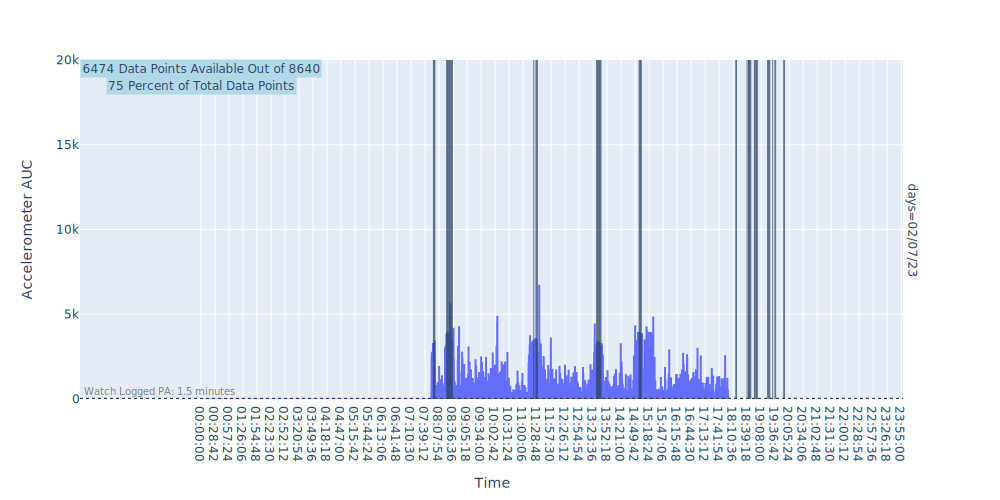

In [145]:
watch_plt = create_annotated_pa_plot(physical_activity_algorithm = 'watch',
                                     ht = 500,
                                     wt = 1000,
                                     xaxis_label = 'Time',
                                     yaxis_label = 'Accelerometer AUC',
                                     save = False)

watch_plt.show(renderer='svg')


### Python algorithm physical activity

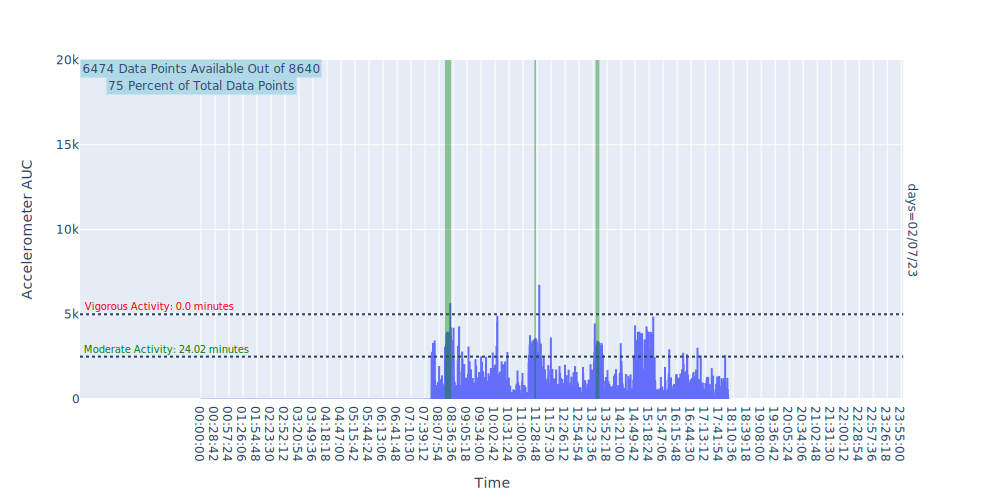

In [146]:
python_plt = create_annotated_pa_plot(physical_activity_algorithm = 'python', 
                                     ht = 500,
                                     wt = 1000,
                                     xaxis_label = 'Time',
                                     yaxis_label = 'Accelerometer AUC',
                                     save = False)
python_plt.show(renderer = 'svg')
python_plt.write_image(_SAVE_PATH_)

### Python and watch logged physical activity

In [147]:
watch_and_python_plt = create_annotated_pa_plot(physical_activity_algorithm = 'both', 
                                     ht = 500,
                                     wt = 1000,
                                     xaxis_label = 'Time',
                                     yaxis_label = 'Accelerometer AUC',
                                     save = False)

watch_and_python_plt.show()

watch_and_python_plt.write_image(bothsave)

### Saving dataframe to CSV

In [148]:
usr_input = str(input("Do you wish to write the dataset into an excel: Y/N: "))
if usr_input == "Y" or usr_input == "y":
    df2.to_csv(_SAVE_DF_)
    print("Saved dataframe: ", _SAVE_DF_)

Do you wish to write the dataset into an excel: Y/N: y
Saved dataframe:  C://Users/tug63306/Documents/R01 JITAI Project/JITAI Lab Member Data/Ha/Python CSV Files/February/Feb7.csv


In [149]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
